# Project: Investigate a Dataset - [No show apointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
<br>
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
<br>
● ‘Neighborhood’ indicates the
location of the hospital.
<br>
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
<br>
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.



### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [58]:
#importing all needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
#uploading data set
df = pd.read_csv('noshow.csv');
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


In [60]:
#to know the complete voulom of the data set
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(None, (110527, 14))

No missing data<br>
No nan values<br>
No incorrect data types<br>

In [61]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

No duplicates

In [62]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The min of the age is not logical


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [63]:
#droping the columns I will not use in my analysis
df.drop(['PatientId','AppointmentDay','AppointmentID','ScheduledDay'], axis=1 , inplace=True)
#editing and correcting some titels
df.rename(columns={'No-show':'NoShow'}, inplace=True)
df.rename(columns={'SMS_received':'SMSreceived'}, inplace=True)
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.head() 

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMSreceived,NoShow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [64]:
#searching for the index of age incorrect values
incorrectvalue = df.query('Age=="-1"')
incorrectvalue

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMSreceived,NoShow


because it's one row it wont make a big differance if we drop that out

In [65]:
#droping that row of age column
df.drop(index=99832 , inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

 Now that I've trimmed and cleaned the data, ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that I've posed in the Introduction section. 



### Research Question 1 (Overveiw on the dataset statistics)

In [66]:
#compair the count of people who showed up and Patients who did not
showed = df.NoShow == "No"
missed = df.NoShow == 'Yes'
df[showed].count(),df['Age'][showed].mean(),df[missed].count(),df['Age'][missed].mean()

(Gender           88207
 Age              88207
 Neighbourhood    88207
 Scholarship      88207
 Hypertension     88207
 Diabetes         88207
 Alcoholism       88207
 Handcap          88207
 SMSreceived      88207
 NoShow           88207
 dtype: int64,
 37.790504154999034,
 Gender           22319
 Age              22319
 Neighbourhood    22319
 Scholarship      22319
 Hypertension     22319
 Diabetes         22319
 Alcoholism       22319
 Handcap          22319
 SMSreceived      22319
 NoShow           22319
 dtype: int64,
 34.31766656212196)

<li>Almost 80% of patients showed up in their appointments, Average age is 37
<li>Almost 20% missed their appointments, Average age is 34
    <br><br> Average Age almost the same

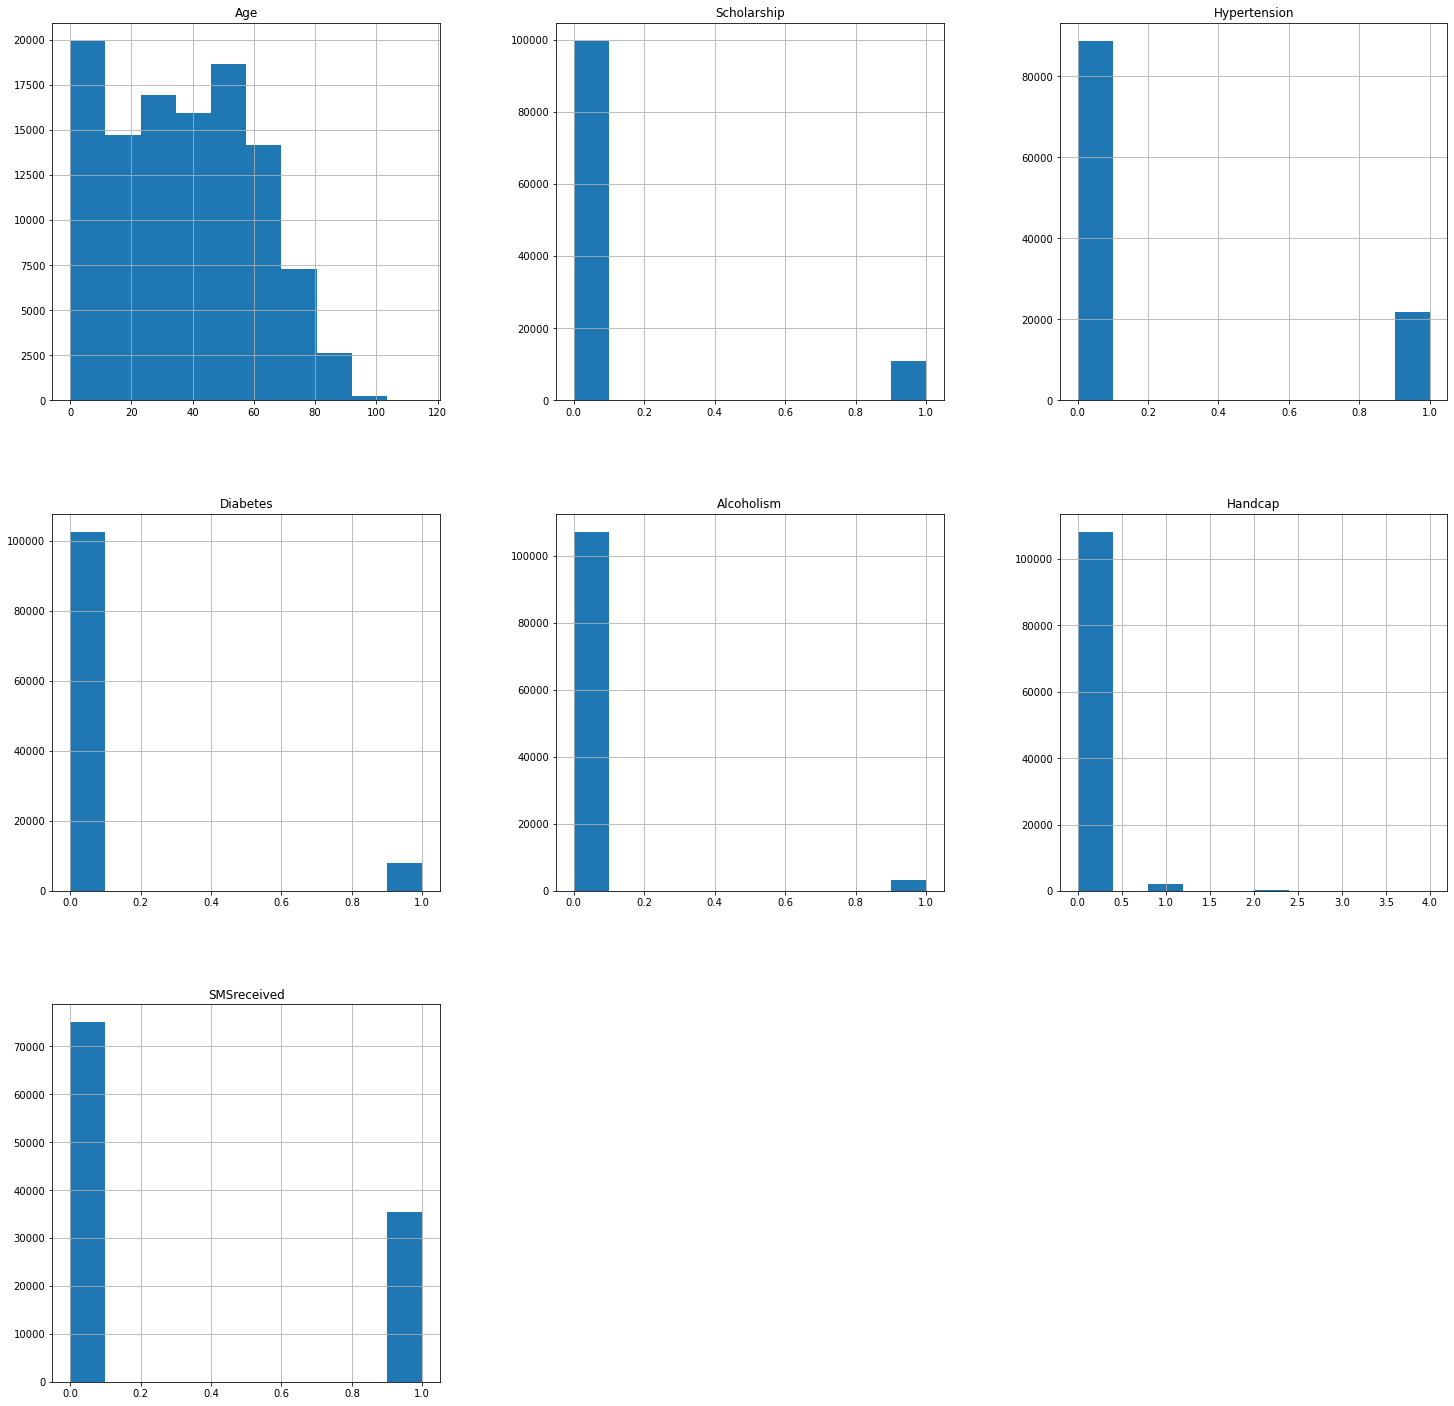

In [67]:
#histogram to the whole data set
df.hist(figsize=(25,25));

<li>less than 10% Patients are enrolled in Brasilian welfare program<br>
<li> less than 20% Patients suffered from hypertension<br>
<li> Most patients didn't suffer from  handicap ,Diabetes or Alcoholism <br>
<li> Patients who received SMS and showed up on their appointments are half of those who didn't

### Research Question 2  ( finding relations between different factors for deeber analysis )

In [83]:
#Comparing between attendances and absentees by age
def Hist(df,col_name,S,M):
    plt.figure(figsize=[10,5])
    df[col_name][S].hist(alpha=0.5,bins=20,color='green',label='showed')
    df[col_name][M].hist(alpha=0.5,bins=20,color='red',label='missed')
    plt.legend();
    plt.title('comparing between attendances and absentees by '+str(col_name)) 
       
#Comparing between attendances and absentees by gender percentage
def pie1 (df,col_name,SorM,x):
    plt.figure(figsize=[7,7])
    df[col_name][SorM].value_counts().plot.pie(autopct='%1.1f%%')
    plt.legend();
    plt.title('patients who '+str(x))

#finding the relation between chronic diseases age and attendance  
def GroupBy(df,col_name1,col_name2,col_name3,S,M,x):
    plt.figure(figsize=[14,7])
    df[S].groupby([col_name1,col_name2]).mean()[col_name3].plot(kind='bar',alpha=0.5,color='green',label='S')
    df[M].groupby([col_name1,col_name2]).mean()[col_name3].plot(kind='bar',alpha=0.5,color='red',label='M')
    plt.legend();
    plt.title('comparing between attendances and absentees by '+str(x)+" "+str(col_name3))
    plt.xlabel('Age')
    plt.ylabel('patients number')

#comparing attendance from each Neighbourhood
def pie2 (df,col_name,SorM,x):
    plt.figure(figsize=[25,25])
    df[col_name][SorM].value_counts().plot.pie(autopct='%1.1f%%')
    plt.legend();
    plt.title('patients who '+str(x))
   
#def bar(df,col_name,S,M):
    #plt.figure(figsize=[20,7])
    #df[col_name][S].value_counts().plot(kind='bar',alpha=0.5,color='green',label='S')
    #df[col_name][M].value_counts().plot(kind='bar',alpha=0.5,color='red',label='M')
    #plt.legend();
    #plt.title('comparing between attendances and absentees by '+str(col_name))
    #plt.xlabel(col_name)
    #plt.ylabel('patients number')

# Question :
Does age effect patients attendance ?

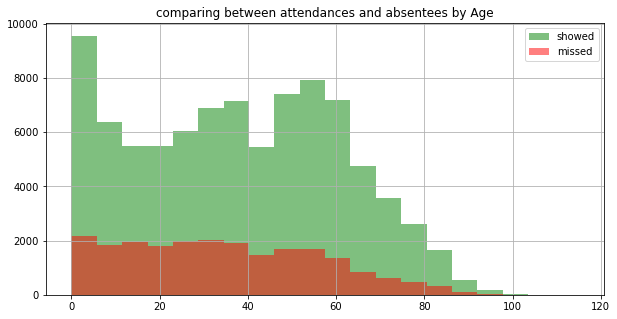

In [84]:
#Comparing between attendances and absentees by age
Hist(df,'Age',showed,missed);

kids and middle age are most likely to show up on their appointments , young youth and old people are less like to show up.<br>that means parents and middle ages care more about their children's and their own health

# Question :
Does gender effect patients attendance ?

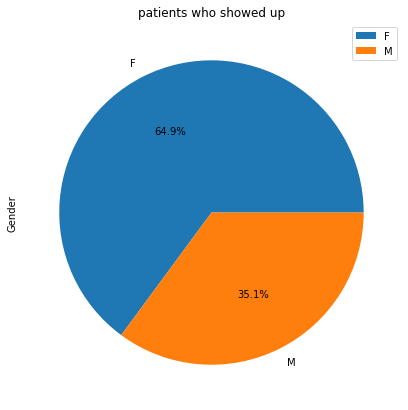

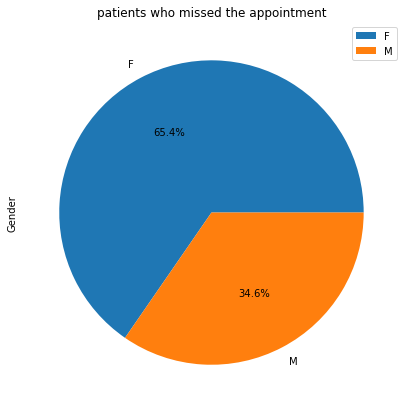

In [85]:
#Comparing between attendances and absentees by gender percentage
pie1(df,'Gender', showed,'showed up'),pie1(df,'Gender', missed,'missed the appointment');    

there is barely a difference <br> gender does not effect attendance percentage.

# Question :
Does receiving SMS effects attendance persentage ?

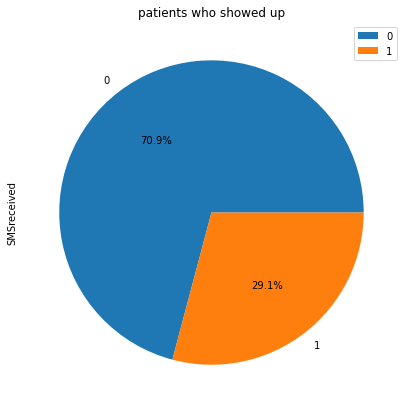

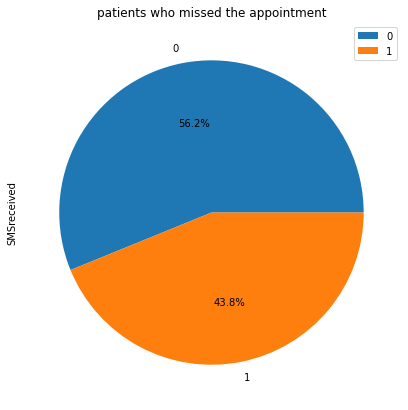

In [86]:
#comparing between attendance and absentees by receiving SMS
pie1(df,'SMSreceived',showed,'showed up'),pie1(df,'SMSreceived',missed,'missed the appointment');

patients who received SMS are more likely to miss their appointments which means there some thing wrong with it.
<br>there is probability that the SMS does not contain the right information about scheduled day or hour

# Q :
Does suffering from Alcoholism effect patients attendance ?

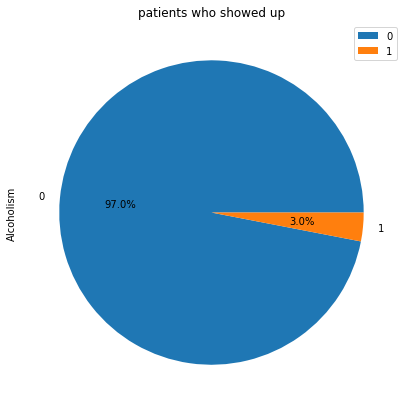

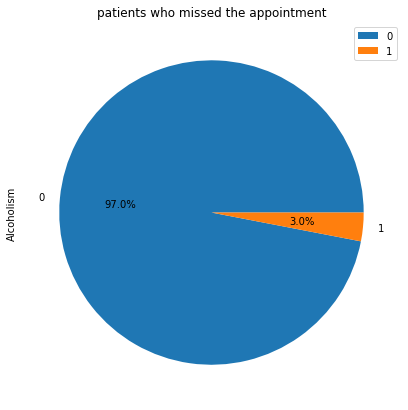

In [88]:
#Comparing between attendances and absentees by having Alcoholism percentage
pie1(df,'Alcoholism', showed,'showed up'),pie1(df,'Alcoholism', missed,'missed the appointment');  

patients suffering from Alcoholism did not effect attendance percentage

# Q :
Does suffering from Handcap effect patients attendance ?

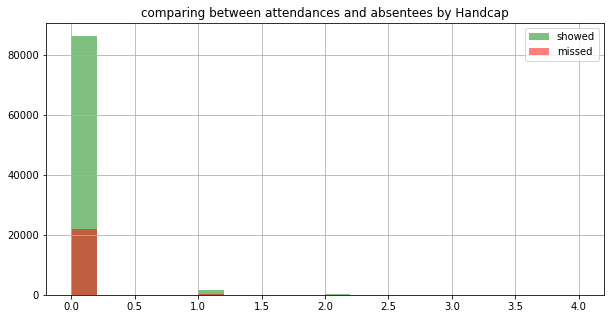

In [89]:
#Comparing between attendances and absentees by having Handcap percentage
Hist(df,'Handcap', showed,missed);  

patients suffering from handcap did not effect attendance percentage

# Q :
what is the relation between the chronic diseases , age and attendance

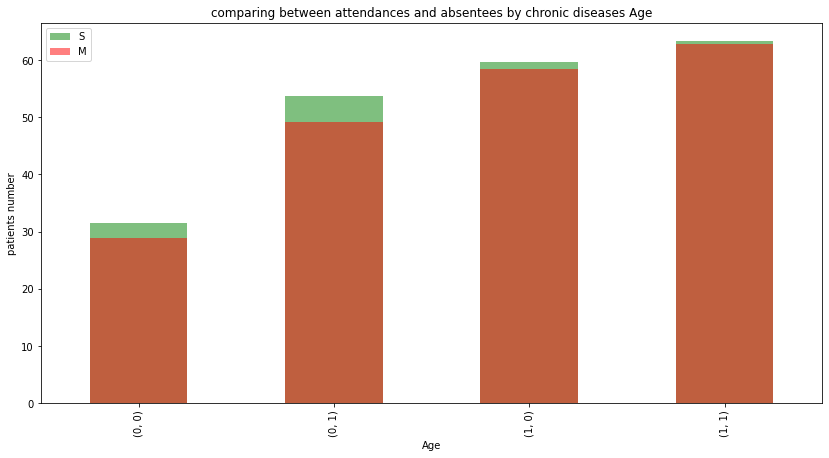

In [80]:
#finding the relation between chronic diseases age and attendance 
GroupBy(df,'Hypertension','Diabetes','Age',showed,missed,'chronic diseases');  

there is a clear relation between age and having chronic diseases but there is no effect to attendance percentage.

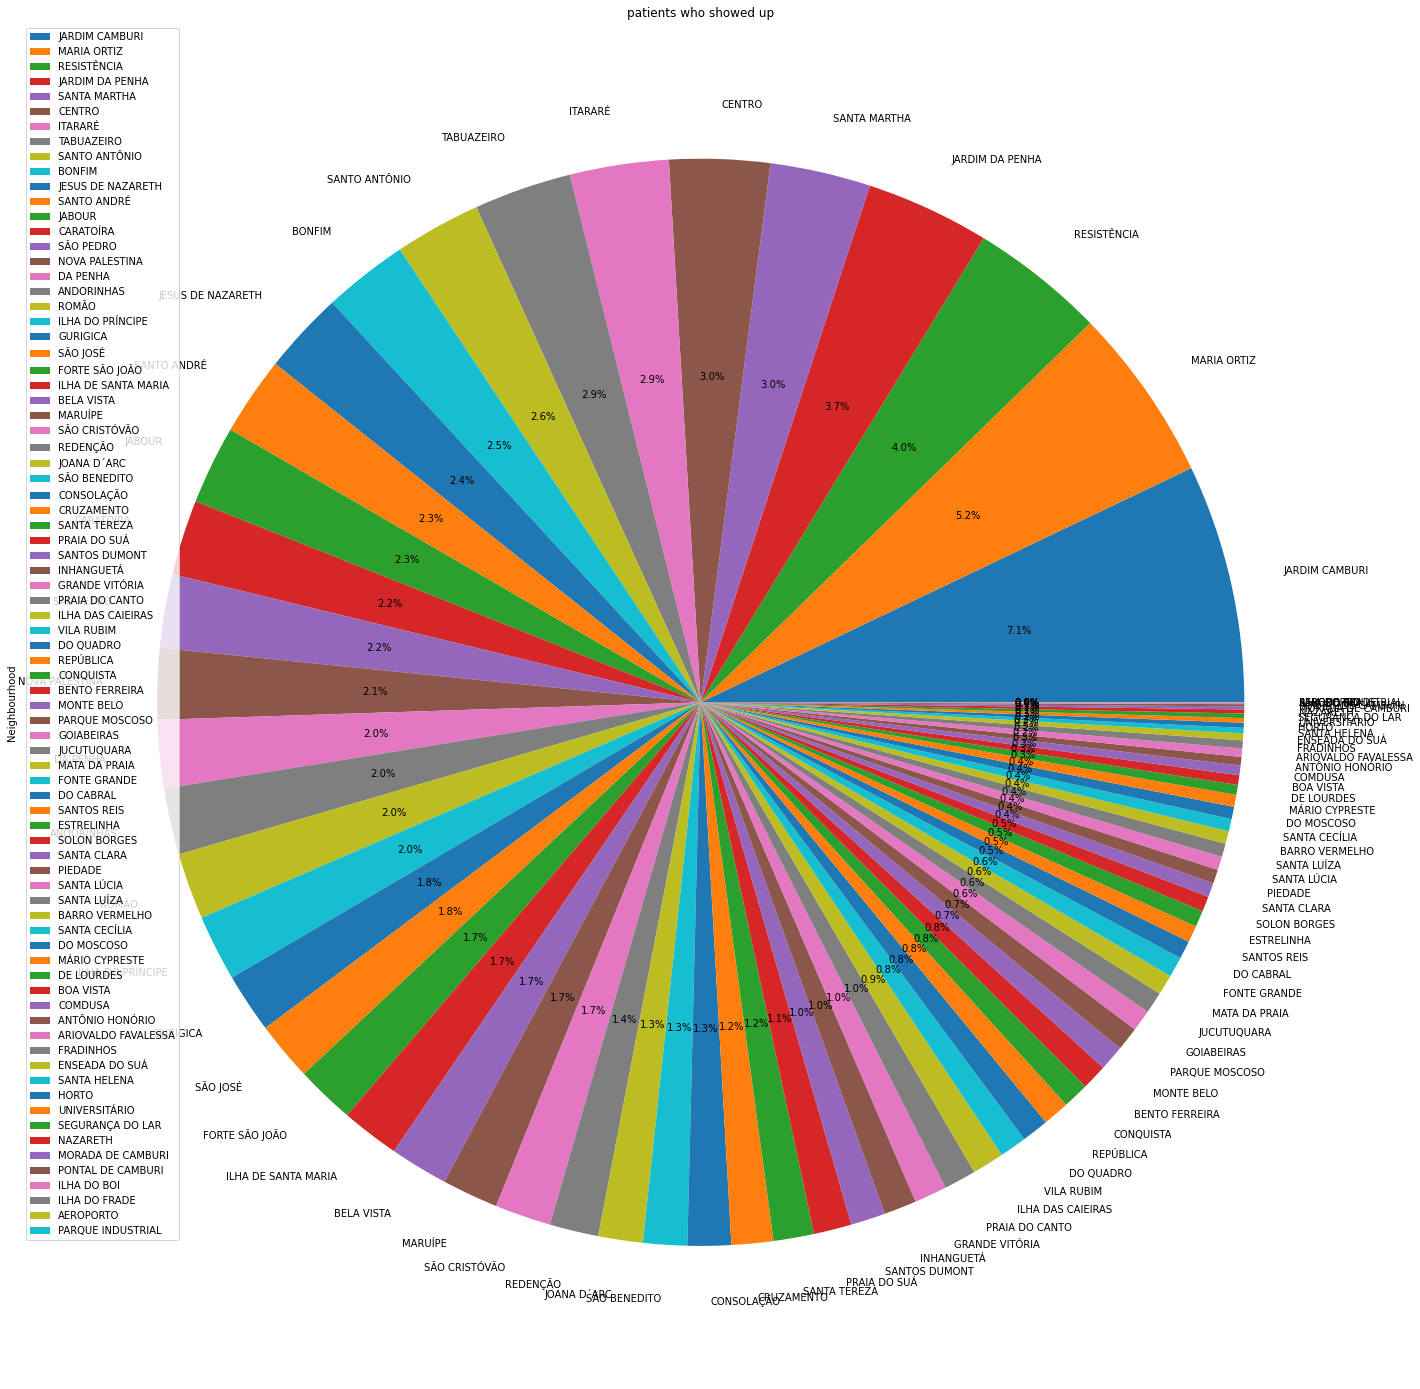

In [81]:
pie2(df,'Neighbourhood',showed,'showed up'); 

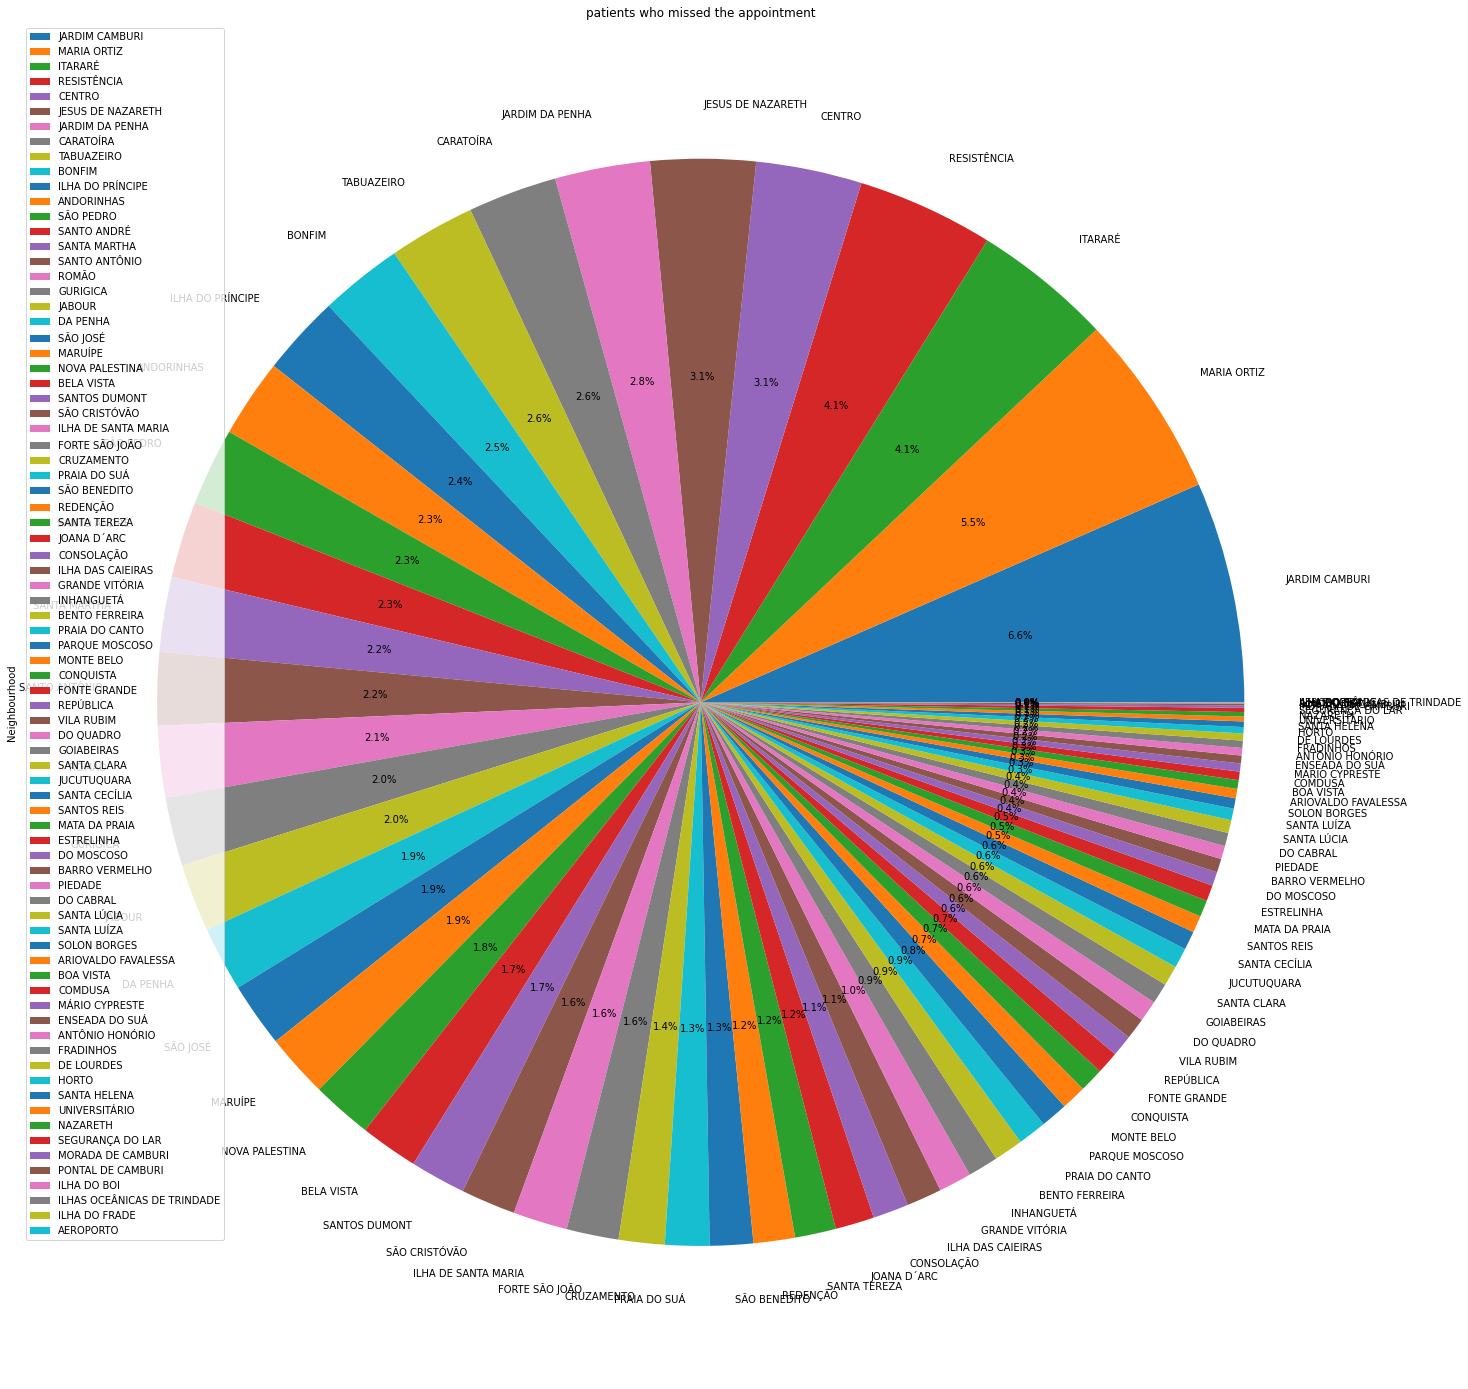

In [82]:
pie2(df,'Neighbourhood',missed,'missed the appointment');

Neighbourhood does had that much of effect on attendance but one neighbourhood had a higher percent of attendance "jARDIM CAMBURI" 

<a id='conclusions'></a>
## Conclusions

● Almost 80% of patients showed up in their appointments ,Almost 20% missed their appointments.<br>
● Age had noticeable effect on attendance percentage .kids and middle age are most likely to show up on their appointments , young youth and old people are less like to show up. that means parents and middle ages care more about their children's and their own health.<br>
● gender does not effect attendance percentage.<br>
● Patients who received SMS and showed up on their appointments are half of those who didn't .patients who received SMS are more likely to miss their appointments which means there some thing wrong with it. there is probability that the SMS does not contain the right information about scheduled day or hour.<br>
● there is a clear relation between age and having chronic diseases.<br>
● patients suffering from handcap and Alcoholism did not effect attendance percentage.<br>
● Neighbourhood does had that much of effect on attendance but one neighbourhood had a higher percent of attendance "jARDIM CAMBURI".